In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO

import requests

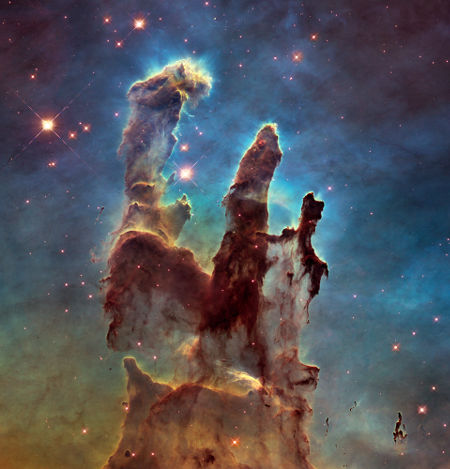

In [19]:
url = 'https://static.preparaenem.com/conteudo_legenda/33bb44f93158072f96d14c854f9badc4.jpg'
response = requests.get(url)

image = Image.open(BytesIO(response.content)).convert()
image

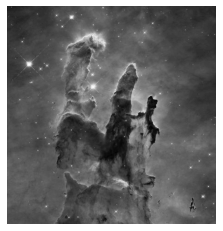

In [20]:
img_arr = np.copy(image)
# img_arr.shape
img_gray_average = np.mean(img_arr, axis=2)

# img_gray_average

plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()



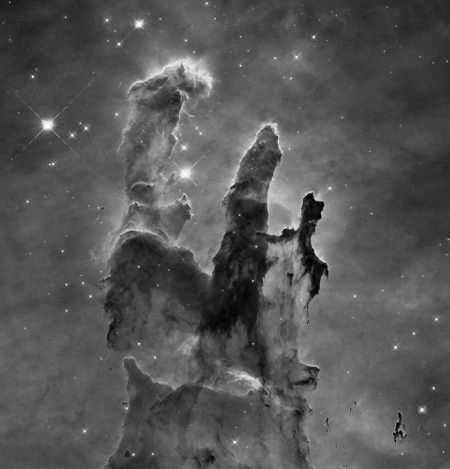

In [21]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)
new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

img_res = Image.fromarray(new_img_gray_average)
img_res

In [22]:
img_gray_average.shape

(469, 450)

## Aplicação do _luminance perception_

$ Y_{linear} = 0.2126R_{linear} + 0.7152G_{linear} + 0.0722B_{linear}$

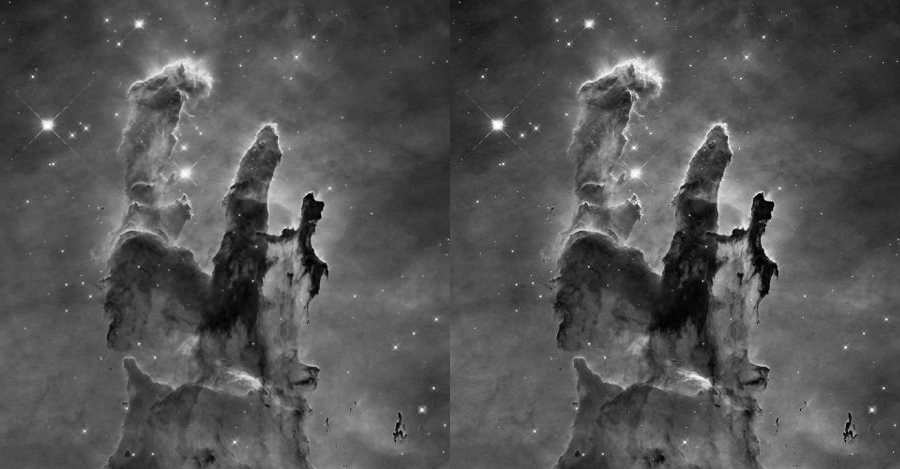

In [23]:
pesos = [0.2126, 0.7152, 0.0722]

res = np.array(img_arr * pesos, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)

concat = np.array(np.concatenate((img_gray_average,y), axis=1), dtype=np.uint8)

img_ones = Image.fromarray(concat)
img_ones

In [24]:
print(res[0,0,:])
print(img_arr[0,0,:])

[ 8 15  2]
[39 21 33]


In [25]:
res.shape

(469, 450, 3)

In [26]:
np.sum(res, axis=2).shape

(469, 450)

In [27]:
full = 1408 * 2400 * 3
original = 2750 *  4687 * 3

print(f"full: {full}, original: {original} {original/full}")

full: 10137600, original: 38667750 3.8142903645833335


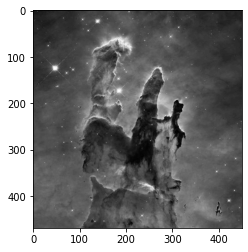

In [28]:
new_array_test = np.sum(res, axis=2)
type(new_array_test)

plt.imshow(new_array_test, cmap='gray')
plt.show()

## Aplicação do _Gamma Compression_

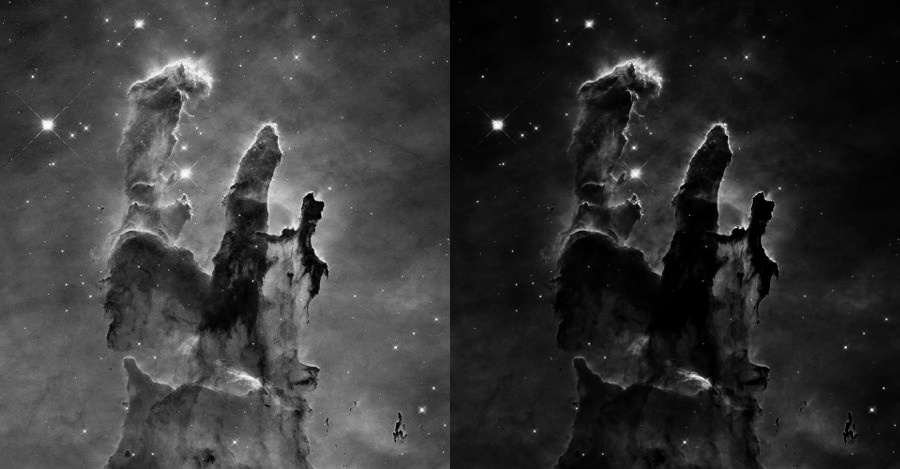

In [35]:
gamma_arr_img = np.array(y)
im_22 = 255.0 * (gamma_arr_img  / 255.0)**2.2
juncao = np.array(np.concatenate((y,im_22), axis=1), dtype=np.uint8)
imagem_final = Image.fromarray(np.uint8(juncao))
imagem_final

## Aplicação da _Aproximação Linear_

---

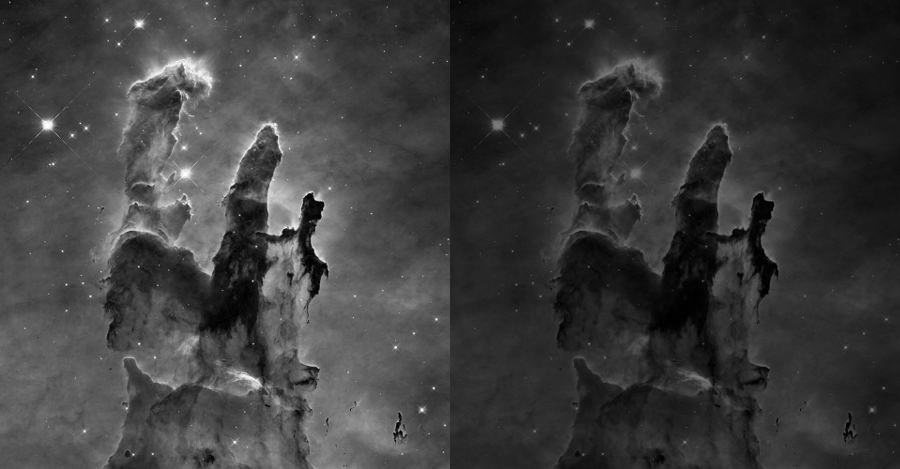

In [38]:
nums = [0.299, 0.587, 0.114]

saida = np.array(res * nums, dtype=np.uint8)
y1 = np.array(np.sum(saida, axis=2), dtype=np.uint8)
juncao = np.array(np.concatenate((y,y1), axis=1), dtype=np.uint8)
imagem_final = Image.fromarray(juncao)
imagem_final